<a href="https://colab.research.google.com/github/Bchea99/coffee-monitor/blob/prototype/cupChoice_roast_profiler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

In [ ]:
data = {
    'Temp_data': [1, 2, 3, 4],
    'Temp_data_2': ['A', 'B', 'C', 'D']
}

df = pd.DataFrame(data)

# Export to CSV
csv_file_path = '/roasting_data.csv'
df.to_csv(csv_file_path, index=False)

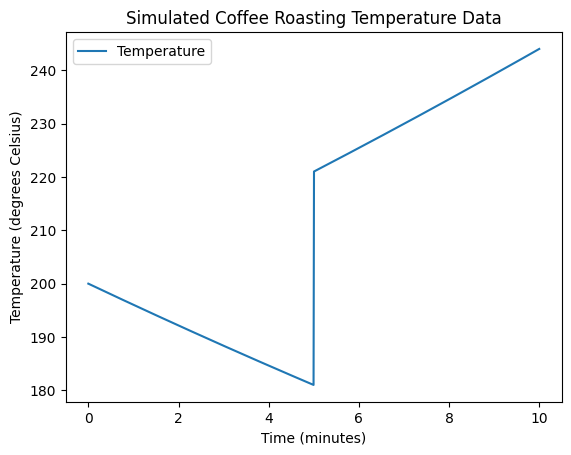

In [ ]:

def simulate_roasting_data(duration, temperature_range, num_points):
    x = np.linspace(0, 1, num_points)
    #temp_drop = np.linspace(temperature_range[0], temperature_range[1], num_points)
    #temp_rise = np.linspace(temp_drop[-1], temperature_range[1], num_points)


    #Steep inverse parabolic curve for time 0:00 to 02:00
    #hardcode duration to 2 for first part
    a1 = 10 * (temperature_range[1] - temperature_range[0]) / duration**2
    b1 = -10 * (temperature_range[1] - temperature_range[0]) / duration
    c1 = temperature_range[0]

    # Define coefficients for the parabolic curve in the second interval (0.5 <= x <= 1)
    a2 = 10 * (temperature_range[1] - temperature_range[0]) / duration**2
    b2 = 10 * (temperature_range[1] - temperature_range[0]) / duration
    c2 = temperature_range[0]

    # Define the piecewise function
    temp_profile = np.piecewise(x, [x < 0.5, x >= 0.5], [lambda x: a1 * x**2 + b1 * x + c1, lambda x: a2 * x**2 + b2 * x + c2])

    #emperature_data = np.concatenate((temp_drop,temp_rise))


    return temp_profile

# Parameters for simulation
roasting_duration = 10  # in minutes
roasting_temperature_range = (200, 240)  # in degrees Celsius
cooling_rate = 1  # in degrees Celsius per minute
data_points = 1000

# Simulate roasting temperature data
temperature_data = simulate_roasting_data(roasting_duration,roasting_temperature_range,data_points)

# Plot the simulated data
time_steps = len(temperature_data)
time_axis = np.linspace(0, roasting_duration, time_steps)  # assuming cooling takes same time as roasting

plt.plot(time_axis, temperature_data, label='Temperature')
plt.title('Simulated Coffee Roasting Temperature Data')
plt.xlabel('Time (minutes)')
plt.ylabel('Temperature (degrees Celsius)')
plt.legend()
plt.show()
